# Iris Classifier avec Keras

Le code ci-dessous montre le fonctionnement de l'API Keras intégrée à Tensorflow avec un réseau de neurone dense basique. Les données sont les données d'entrainement des iris proposée par Tensorflow.

In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

import numpy as np
import pandas as pd
import seaborn as sns

import csv

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

Instructions for updating:
Use the retry module or similar alternatives.
TensorFlow version: 1.7.0
Eager execution: True


# Récupération des données

In [2]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

with open('iris_training.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(''.join(row))



Local copy of the dataset file: C:\Users\julie\.keras\datasets\iris_training.csv
120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1
5.1,3.7,1.5,0.4,0
5.2,2.7,3.9,1.4,1
6.9,3.1,4.9,1.5,1
5.8,4.0,1.2,0.2,0
5.4,3.9,1.7,0.4,0
7.7,3.8,6.7,2.2,2
6.3,3.3,4.7,1.6,1
6.8,3.2,5.9,2.3,2
7.6,3.0,6.6,2.1,2
6.4,3.2,5.3,2.3,2
5.7,4.4,1.5,0.4,0
6.7,3.3,5.7,2.1,2
6.4,2.8,5.6,2.1,2
5.4,3.9,1.3,0.4,0
6.1,2.6,5.6,1.4,2
7.2,3.0,5.8,1.6,2
5.2,3.5,1.5,0.2,0
5.8,2.6,4.0,1.2,1
5.9,3.0,5.1,1.8,2
5.4,3.0,4.5,1.5,1
6.7,3.0,5.0,1.7,1
6.3,2.3,4.4,1.3,1
5.1,2.5,3.0,1.1,1
6.4,3.2,4.5,1.5,1
6.8,3.0,5.5,2.1,2
6.2,2.8,4.8,1.8,2
6.9,3.2,5.7,2.3,2
6.5,3.2,5.1,2.0,2
5.8,2.8,5.1,2.4,2
5.1,3.8,1.5,0.3,0
4.8,3.0,1.4,0.3,0
7.9,3.8,6.4,2.0,2
5.8,2.7,5.1,1.9,2
6.7,3.0,5.2,2.3,2
5.1,3.8,1.9,0.4,0
4.7,3.2,1.6,0.2,0
6.0,2.2,5.0,1.5,2
4.8,3.4,1.6,0.2,0
7.7,2.6,6.9,2.3,2
4.6,3.6,1.0,0.2,0
7.2

In [3]:
def parse_csv(line):
    example_defaults = [[0.], [0.], [0.], [0.], [0]]  # sets field types
    parsed_line = tf.decode_csv(line, example_defaults)
    # First 4 fields are features, combine into single tensor
    features = tf.reshape(parsed_line[:-1], shape=(4,))
    # Last field is the label
    label = tf.reshape(parsed_line[-1], shape=())
    return features, label

train_dataset = tf.data.TextLineDataset(train_dataset_fp)
train_dataset = train_dataset.skip(1)             # skip the first header row
train_dataset = train_dataset.map(parse_csv)      # parse each row
train_dataset = train_dataset.shuffle(buffer_size=1000)  # randomize
train_dataset = train_dataset.batch(32)

# View a single example entry from a batch
features, label = tfe.Iterator(train_dataset).next()
print("example features:", features[0])
print("example label:", label[0])

example features: tf.Tensor([ 6.5999999   2.9000001   4.5999999   1.29999995], shape=(4,), dtype=float32)
example label: tf.Tensor(1, shape=(), dtype=int32)


In [4]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3, activation = "softmax")
])

def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

def grad(model, inputs, targets):
    with tfe.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)

# Entrainement

Epoch 000: Loss: 1.090, Accuracy: 30.000%
Epoch 050: Loss: 0.959, Accuracy: 70.000%
Epoch 100: Loss: 0.889, Accuracy: 70.000%
Epoch 150: Loss: 0.848, Accuracy: 70.000%
Epoch 200: Loss: 0.836, Accuracy: 70.000%
Epoch 250: Loss: 0.812, Accuracy: 70.000%
Epoch 300: Loss: 0.791, Accuracy: 70.833%
Epoch 350: Loss: 0.768, Accuracy: 85.000%
Epoch 400: Loss: 0.751, Accuracy: 90.833%
Epoch 450: Loss: 0.732, Accuracy: 94.167%
Epoch 500: Loss: 0.709, Accuracy: 96.667%
Epoch 550: Loss: 0.691, Accuracy: 97.500%
Epoch 600: Loss: 0.677, Accuracy: 97.500%
Epoch 650: Loss: 0.662, Accuracy: 98.333%
Epoch 700: Loss: 0.650, Accuracy: 98.333%
Epoch 750: Loss: 0.638, Accuracy: 98.333%
Epoch 800: Loss: 0.635, Accuracy: 98.333%
Epoch 850: Loss: 0.626, Accuracy: 98.333%
Epoch 900: Loss: 0.621, Accuracy: 98.333%
Epoch 950: Loss: 0.617, Accuracy: 98.333%
Epoch 1000: Loss: 0.610, Accuracy: 98.333%
Epoch 1050: Loss: 0.610, Accuracy: 98.333%
Epoch 1100: Loss: 0.605, Accuracy: 98.333%
Epoch 1150: Loss: 0.606, Accura

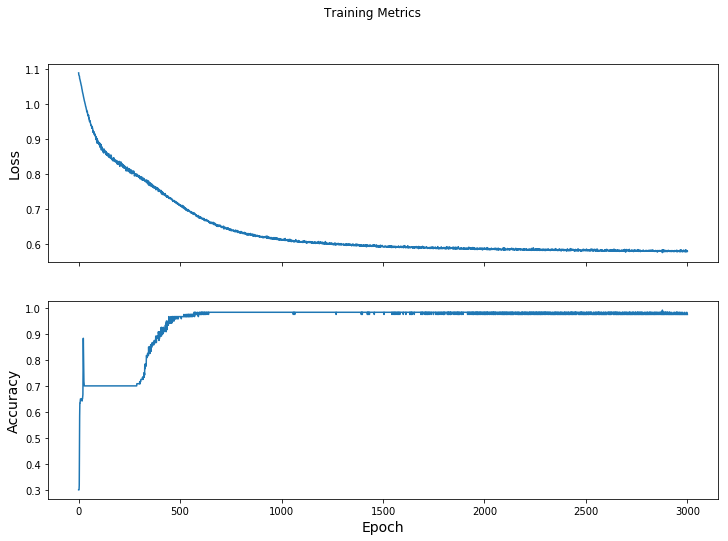

In [5]:

## Note: Rerunning this cell uses the same model variables

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 3001

for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
    for x, y in tfe.Iterator(train_dataset):
    # Optimize the model
        grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.variables),global_step=tf.train.get_or_create_global_step())

    # Track progress
        epoch_loss_avg(loss(model, x, y))  # add current batch loss
    
    # compare predicted label to actual label
        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(),epoch_accuracy.result()))
        

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

# Test

In [6]:

test_url = "http://download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

test_dataset = tf.data.TextLineDataset(test_fp)
test_dataset = test_dataset.skip(1)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(1000)       # randomize
test_dataset = test_dataset.batch(32)           # use the same batch size as the training set

test_accuracy = tfe.metrics.Accuracy()

for (x, y) in tfe.Iterator(test_dataset):
    prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


# Prediction

Tenter de prédire des données non labelisée.

In [7]:
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    name = class_ids[class_idx]
    print("Example {} prediction: {}".format(i, name))

Example 0 prediction: Iris setosa
Example 1 prediction: Iris versicolor
Example 2 prediction: Iris virginica
